In [80]:
from keras.layers import Input
from keras.layers import Conv2D,MaxPooling2D, GlobalMaxPooling2D, UpSampling2D
from keras.models import Model
from os import listdir
import os
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
import cv2

In [40]:
def image_to_feature_vector(img, size=(96,96)):         # Avg Dim 1798,1260
    return cv2.resize(img, size).flatten()

In [41]:
path = '/home/jugs/PycharmProjects/compression/face/'

In [42]:
onlyfiles = [f for f in listdir(path)]

In [43]:
data = []
for f in onlyfiles:
    fp = os.path.join(path, f)
    x = cv2.imread(fp)
    x = image_to_feature_vector(x)
    x = x.astype('float32') / 255
    x = np.reshape(x, (96, 96, 3))
    data.append(x)

In [59]:
x_train = np.reshape(data[:5000], (5000, 96,96,3))
x_test = np.reshape(data[5001:], (1936, 96,96,3))

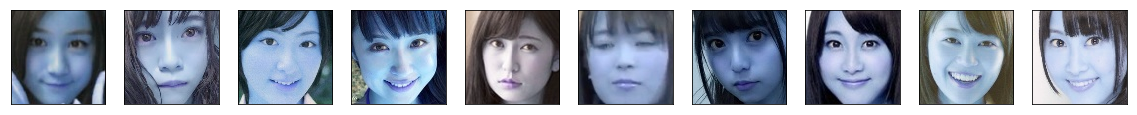

In [60]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(96, 96,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
img_input = Input(shape=(96,96,3))

In [101]:
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

# Upscaling

x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)

x = UpSampling2D((2,2))(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)

x = UpSampling2D((2,2))(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)

x = UpSampling2D((2,2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)

x = UpSampling2D((2,2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)

# x = UpSampling2D((2,2))(x)
x = Conv2D(3, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(3, (3, 3), activation='relu', padding='same')(x)

In [102]:
model = Model(img_input, x, name='vgg16_face')

In [103]:
model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['acc'])

In [104]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 96, 96, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 24, 24, 128)       0         
__________

In [ ]:
model.fit(x_train, x_train, epochs=2, batch_size=128,
                    shuffle=True, validation_data=(x_test, x_test))

Train on 5000 samples, validate on 1936 samples
Epoch 1/2
